In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
# from wordcloud import WordCloud,STOPWORDS

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KOU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#
tip = pd.read_csv('data/burgers_tip.csv')[['text','date','compliment_count']]
tip.head()

,text,date,compliment_count
0,I love it here.,2013-12-15 22:03:47,0
1,The French fries are delicious. They are some ...,2015-09-19 17:28:07,0
2,"Getting a tire repaired nearby, so here I sit ...",2010-09-24 20:20:41,0
3,Great place to hang out. Great food and beer.,2015-01-20 02:16:13,0
4,Vegetable beef soup and grilled cheese. Love t...,2011-05-15 23:37:18,0


In [3]:
def extract_year(date):
    return re.findall('^(.{4})-' ,date)[0]

In [4]:
tip['year'] = tip.date.apply(extract_year)
tip.drop(['date'],axis=1,inplace=True)

In [5]:
tip.head()

,text,compliment_count,year
0,I love it here.,0,2013
1,The French fries are delicious. They are some ...,0,2015
2,"Getting a tire repaired nearby, so here I sit ...",0,2010
3,Great place to hang out. Great food and beer.,0,2015
4,Vegetable beef soup and grilled cheese. Love t...,0,2011


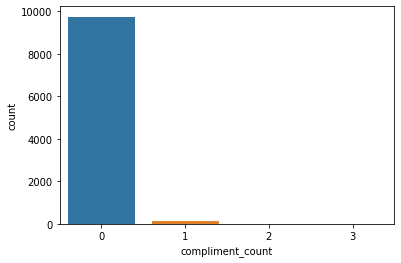

In [6]:
sns.countplot(tip.compliment_count)

In [12]:
def remove_punc_stopword(text):
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

def get_2word(text):
    returnlist =[]
    biwords = list(nltk.bigrams(text))
    for biword in biwords:
        returnlist.append(' '.join(biword))
    return returnlist

In [19]:
tip['text_single'] = tip.text.apply(remove_punc_stopword)
tip['text_bi'] = tip.text_single.apply(get_2word)

In [20]:
tip.head()

,text,compliment_count,year,text_single,text_bi
0,I love it here.,0,2013,[love],[]
1,The French fries are delicious. They are some ...,0,2015,"[french, fries, delicious, best, ive, ever]","[french fries, fries delicious, delicious best..."
2,"Getting a tire repaired nearby, so here I sit ...",0,2010,"[getting, tire, repaired, nearby, sit, listeni...","[getting tire, tire repaired, repaired nearby,..."
3,Great place to hang out. Great food and beer.,0,2015,"[great, place, hang, great, food, beer]","[great place, place hang, hang great, great fo..."
4,Vegetable beef soup and grilled cheese. Love t...,0,2011,"[vegetable, beef, soup, grilled, cheese, love,...","[vegetable beef, beef soup, soup grilled, gril..."


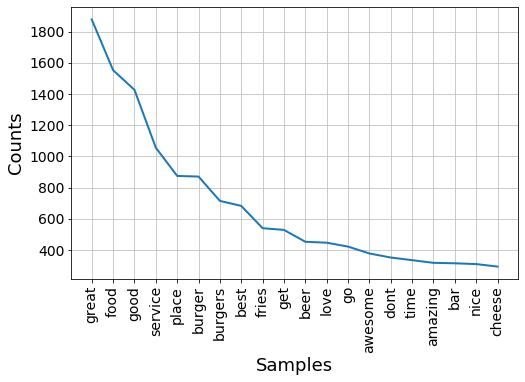

In [25]:
word_split = []
for i in range(tip.shape[0]):
    for word in tip.text_single[i]:
        word_split.append(word)
        
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
FreqDist(word_split).plot(20,cumulative=False)

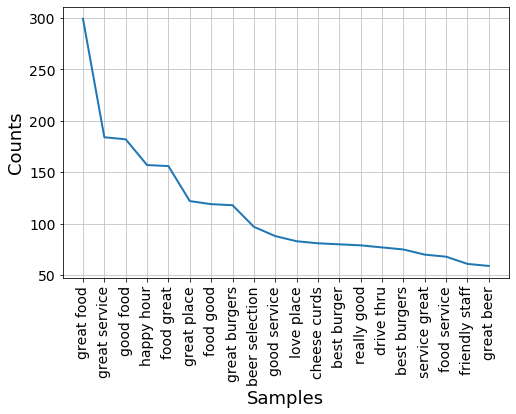

In [26]:
word_split = []
for i in range(tip.shape[0]):
    for word in tip.text_bi[i]:
        word_split.append(word)
        
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
FreqDist(word_split).plot(20,cumulative=False)

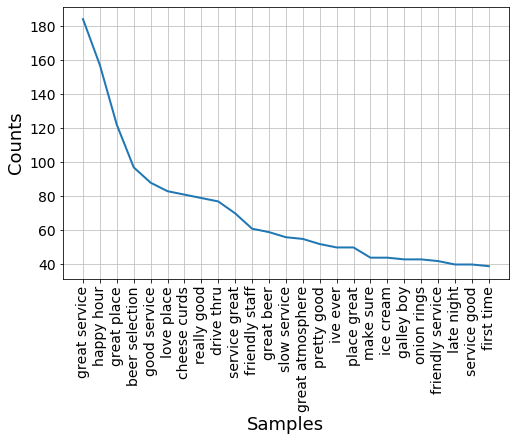

In [27]:
word_split = []
for i in range(tip.shape[0]):
    for word in tip.text_bi[i]:
        if 'food' not in word and 'burger' not in word and 'burgers' not in word:
            word_split.append(word)
        
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
FreqDist(word_split).plot(25,cumulative=False)

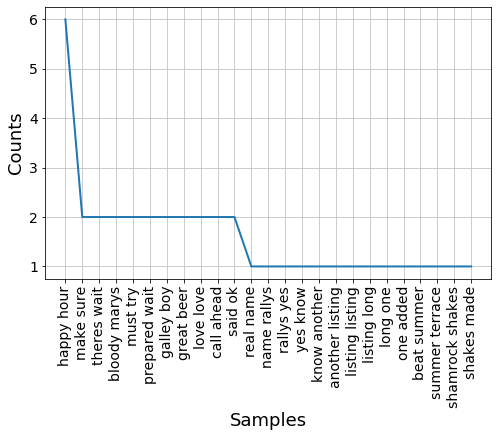

In [28]:
word_split = []
good_tip = tip[tip.compliment_count>0].reset_index(drop=True)
for i in range(good_tip.shape[0]):
    for word in good_tip['text_bi'][i]:
        if 'food' not in word and 'burger' not in word and 'burgers' not in word:
            word_split.append(word)
        
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
FreqDist(word_split).plot(25,cumulative=False)